In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("stats_clean.csv")

In [16]:
from sklearn.preprocessing import StandardScaler
classes = ['age_cat', 'gender']
# Separating out the features
x = df.drop(classes, axis=1)
# Separating out the classes
y = df.loc[:, classes].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [26]:
finalDf = pd.concat([principalDf, df[classes]], axis = 1)

In [42]:
finalDf.age_cat.unique()

array(['(48.5, 57.2]', '(22.4, 31.1]', '(13.7, 22.4]', '(57.2, 65.9]',
       '(31.1, 39.8]', '(39.8, 48.5]', '(65.9, 74.6]', '(4.913, 13.7]',
       '(83.3, 92.0]', '(74.6, 83.3]'], dtype=object)

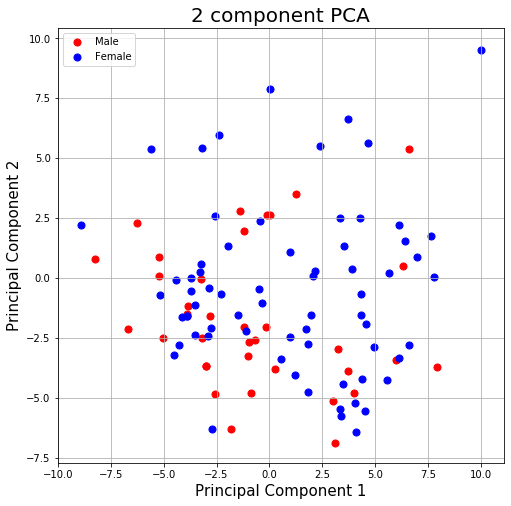

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Male', 'Female']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

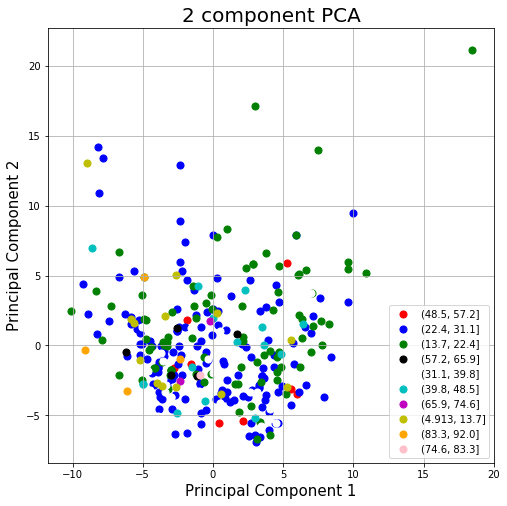

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['(48.5, 57.2]', '(22.4, 31.1]', '(13.7, 22.4]', '(57.2, 65.9]',
       '(31.1, 39.8]', '(39.8, 48.5]', '(65.9, 74.6]', '(4.913, 13.7]',
       '(83.3, 92.0]', '(74.6, 83.3]']
colors = ['r', 'b', 'g', 'k', 'w', 'c', 'm', 'y', 'orange', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['age_cat'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()